Only 50 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
>Metropolis: [sigma]


Output()

/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 0 tune and 50 draw iterations (0 + 200 draws total) took 0 seconds.
The number of samples is too small to check convergence reliably.


{'alpha': array([ 0.        ,  0.        , -0.23325229, -0.46200112]), 'beta': array([8.21761229, 8.5       , 8.5       , 8.5       ]), 'sigma': array([0.5       , 1.004155  , 0.73986905, 0.6310033 ])}
First recorded sample per chain:
First few samples per chain:
a = [[ 0.        ]
 [ 0.        ]
 [-0.23325229]
 [-0.46200112]]
b = [[8.21761229]
 [8.5       ]
 [8.5       ]
 [8.5       ]]


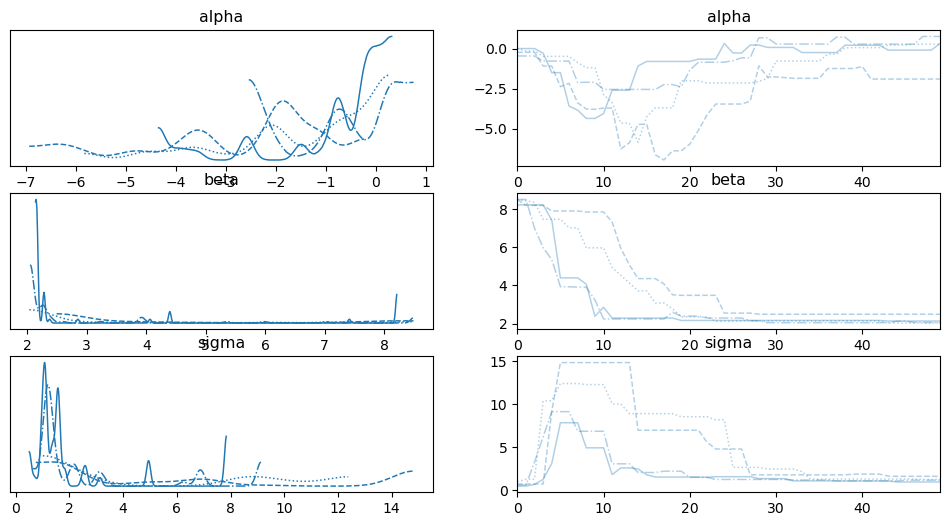

In [3]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# 🔹 Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50)
true_alpha = 1  # Intercept
true_beta = 2   # Slope
y = true_alpha + true_beta * X + np.random.normal(0, 1, size=len(X))  # y = 1 + 2x + noise

# 🔹 Define PyMC model
with pm.Model() as linear_model:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    mu = alpha + beta * X  # Linear model
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # 🔹 Set initial values for MCMC
    initvals = {
        "alpha": 0.0,   # Instead of PyMC's default, we start alpha at 0.5
        "beta": 8.5,    # Start beta at 1.5 (closer to the true value 2)
        "sigma": 0.5    # Start sigma at 0.5
    }

    # 🔹 Run MCMC sampling with custom `initvals`

    step = pm.Metropolis()
    trace = pm.sample(
        draws=50, tune=0, chains=4, step = step, initvals=initvals, return_inferencedata=True, #compute_convergence_checks=False
    )


# Extract the first sample from each chain for all variables
first_samples = trace.posterior.isel(draw=0)  # Select first draw (sample)

# Convert to a dictionary for better readability
first_samples_dict = {var: first_samples[var].values for var in trace.posterior.data_vars}

print(first_samples_dict)



#az.plot_trace(trace.warmup_posterior)

# 🔹 Print the first sampled values to check if `initvals` were respected
print("First recorded sample per chain:")
print("First few samples per chain:")
print("a = "+ str(trace.posterior["alpha"].values[:, :1]))  # First 5 samples of alpha
print("b = "+  str(trace.posterior["beta"].values[:, :1]))   # First 5 samples of beta


# 🔹 Plot trace to inspect sampling behavior
az.plot_trace(trace, compact=True)
plt.show()
